# Text-mining for Model Validation


## Sibel Eker

This notebook presents a text-mining analysis conducted on model validation publications. The analysis is presented in

Eker, S., Rovenskaya, E., Langan, S., Obersteiner, M. (under review) **Validation of resource management models: Practice and perspectives**.

In particular, we present a topic modelling implementation to identify the main topics in the validation publications. We repeat this analysis on two datasets:

1) On model validation

2) On model valdiation and scenarios

The publication datasets are retrieved from Scopus with the following search criteria:

**DATASET I**

- Title, abstract and keywords include "model validation" OR "model validity" OR "model evaluation"  OR  "model assessment"  OR  "model testing"


- Published in English, from 1980 to present


- Limited to the fields Environmental Science; Computer Science; Agricultural and Biological Sciences; Mathematics; Energy; Social Sciences; Economics, Econometrics and Finance; Decision Sciences; Multidisciplinary


- Returned 10739 documents


**DATASET II**

- Title, abstract and keywords include "model validation" OR "model validity" OR "model evaluation"  OR  "model assessment"  OR  "model testing" **AND** "scenario"


- Published in English, from 1980 to present


- Limited to the fields Environmental Science; Computer Science; Agricultural and Biological Sciences; Mathematics; Energy; Social Sciences; Economics, Econometrics and Finance; Decision Sciences; Multidisciplinary


- Returned 748 documents


# 1) DATASET I on only model validation

## Data preparation - Parsing the text file

In [3]:
directory = 'H:/MyDocuments/IIASA-validation/Text_data/April2018/'
files = ['17-18.xlsx',
         '16.xlsx',
         '14-15.xlsx',
         '12-13.xlsx',
         '10-11.xlsx',
         '06-09.xlsx',
         '00-05.xlsx',
         '80-99.xlsx',
         'Barlas.xlsx',
         'Oreskes.xlsx',
         'Jakeman.xlsx']


import pandas as pd
dfs = []
for file in files:
    dfs.append(pd.read_excel(directory+file, index_col='Authors'))

df = pd.concat(dfs)
print(df.shape)

(10756, 10)


In [4]:
df.drop_duplicates(subset='Title', inplace=True)
df.shape

(10699, 10)

After cleaning the duplicates, there are 10699 documents left! Let me remove the ones that has no abstract!

In [5]:
df = df.dropna(axis=0, subset=['Abstract'])
df.shape

(10699, 10)

In [7]:
#NUMBER OF ARTICLES OVER TIME
import numpy as np
years  = np.arange(1980, 2018)
y = {}
for year in years:
    y[year] = len(df[df['Year'] == year])
df_years = pd.DataFrame.from_dict(y, orient='index')
df_years['year'] = df_years.index
df_years.columns = ['Number of validation publications', 'year']
df_years.head()




,Number of validation publications,year
1980,10,1980
1981,21,1981
1982,21,1982
1983,21,1983
1984,26,1984


In [8]:
#This comes from another dataset only on modelling downloaded from Scopus
df_dummy = pd.read_excel(directory+'Total_overtime.xlsx')
for index, row in df_dummy.iterrows():
    df_years.loc[row['year'], 'total'] = row['total']
df_years['total'].head()

1980    3457.0
1981    3928.0
1982    4840.0
1983    5510.0
1984    6022.0
Name: total, dtype: float64

In [9]:
df_years['Percentage of validation publications in total modeling pub.'] = 100*df_years['Number of validation publications']/df_years['total']

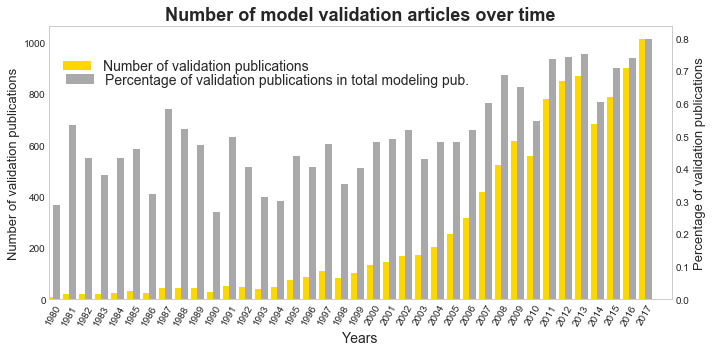

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()


ax.set_ylabel('Number of validation publications', fontsize=13)
ax2.set_ylabel('Percentage of validation publications', fontsize=13)

df_years['Number of validation publications'].plot(kind='bar', color='gold', ax=ax, width=0.4, position=1)
df_years['Percentage of validation publications in total modeling pub.'].plot(kind='bar', color='darkgrey', ax=ax2, width=0.4, position=0)

ax.set_xlabel('Years', fontsize=14)
ax.set_title("Number of model validation articles over time", fontsize=18, fontweight='bold')
#lbls = list(years[:-1]) + ['2017*']
lbls = list(years)
ax.set_xticklabels(lbls, fontsize=10, rotation=60)
ax.grid(False)
ax2.grid(False)
ax.legend(loc=0, scatterpoints = 1, fontsize=14, bbox_to_anchor=(0.425, .9), borderaxespad=0.)
ax2.legend(loc=0, scatterpoints = 1, fontsize=14, bbox_to_anchor=(0.684, .85), borderaxespad=0.)
plt.tight_layout()
#plt.savefig(directory+'OverTime_v2.png', dpi=600, )
plt.show()

## Remove the stopwords from the abstracts

In [12]:
stopwords =[]
with open(directory+'stopwords.txt', 'r') as f:      
    for line in f:
        word=line.rstrip()
        stopwords.append(word)
f.close()

#print(stopwords)

## Clean the abstracts and count the words

In [14]:
import collections as c
import nltk 
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer() 

# create a dictionary to save your work
counter_dict = {}
all_words = c.Counter()

# Get the article id
for index, row in df.iterrows():
    
    # Initialize your counts and lists
    # This is reset with every article
    content = c.Counter()
    stopwordcount = 0

    abstract = row['Abstract']

    # Remove most punctuation
    #depunct = re.sub('[;,\.]@','',abstract) 
    depunct = "".join(c for c in abstract if c not in [':', ',', ';', '.', '-', '@', '(', ')']) 
    # Remove upper case
    low = depunct.lower()
    # make a list of words
    words = low.split(" ")
    for word in words:
        if word in stopwords:
            # if its a stopword count it 
            stopwordcount+=1
        else:
            # if its a content word, stem it and count it
            stem = stemmer.stem(word)
            content[stem]+=1

    # add all the stopwords under a single count
    content['allstopwords']=stopwordcount

    # keep track of the total list of words
    all_words+=content

    # make a dictionary of counters, one for each abstract

    counter_dict[index]=content

    # start again on the next article

In [15]:
#most common words in the collection of all these abstracts
print(all_words.most_common(20))

[('allstopwords', 1006956), ('data', 12122), ('predict', 9208), ('simul', 8633), ('result', 7911), ('system', 6664), ('develop', 6313), ('evalu', 6284), ('perform', 5734), ('test', 5692), ('method', 5631), ('water', 5596), ('model', 5550), ('estim', 5455), ('measur', 5401), ('soil', 5399), ('base', 5003), ('paramet', 4716), ('process', 4559), ('assess', 3839)]


Delete the words that do not mean much in this context. For example, we know that model is there, because we searched for the publications with "model" as the keyword, therefore we can remove it.

In [16]:
del_words = ['allstopwords', 'model', 'result', 'show', 'present', 'gener', 'approach', 'elsevi', 'ltd', 'includ', 'perform']
for key in del_words:
    if key in all_words:
        del all_words[key]
    if key in counter_dict:
        del counter_dict[key]

In [14]:
df_wordcount = pd.DataFrame(all_words.most_common(20))
#df_wordcount['words'] = df_wordcount.index.values
#df_wordcount['wordcount'] = df_wordcount[0]
df_wordcount.columns = ['words', 'wordcount']
df_wordcount.head()

,words,wordcount
0,data,11675
1,predict,8914
2,simul,8395
3,system,6502
4,develop,6126


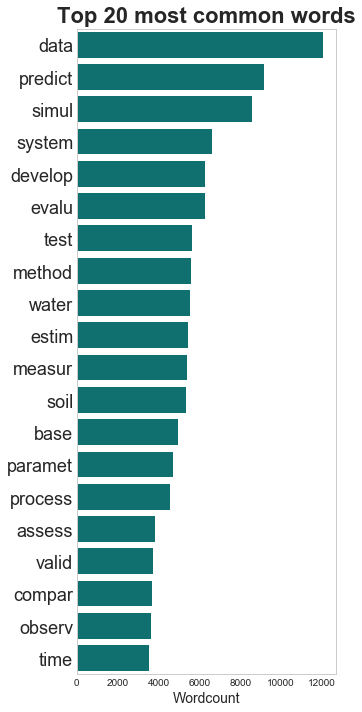

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5, 10))


ax = sns.barplot(x='wordcount', y='words', data=df_wordcount, color="TEAL")
ax.set_ylabel('')
ax.set_xlabel('Wordcount', fontsize=14)
ax.set_title("Top 20 most common words", fontsize=22, fontweight='bold')
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(12) 
ax.set_yticklabels(list(df_wordcount['words']), fontsize=18)
ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'top_words.png', dpi=300, )
plt.show()

In [10]:
import json
with open(directory+'counter_dict_JSON.txt', 'w') as fp:
    json.dump(counter_dict, fp)
fp.close()

with open(directory+'all_words_JSON.txt', 'w') as fp:
    json.dump(all_words, fp)
fp.close()

In [1]:
#IN CASE OF STARTING THE ANALYSIS FROM THE WORD COUNTS OBTAINED EARLIER 

#directory = 'H:/MyDocuments/IIASA-validation/Text_data/April2018/'
#import pandas as pd
#import json
#df_counter = pd.read_json(directory+'counter_dict_JSON.txt', orient='index')

## Top journals

In [18]:
journal_counter = c.Counter()
for index, row in df.iterrows():
    journal = row['Source title']
    journal_counter[journal]+=1

new_list=journal_counter.most_common(20)      
df_journal = pd.DataFrame(new_list)
df_journal.columns = ['journal', 'count']


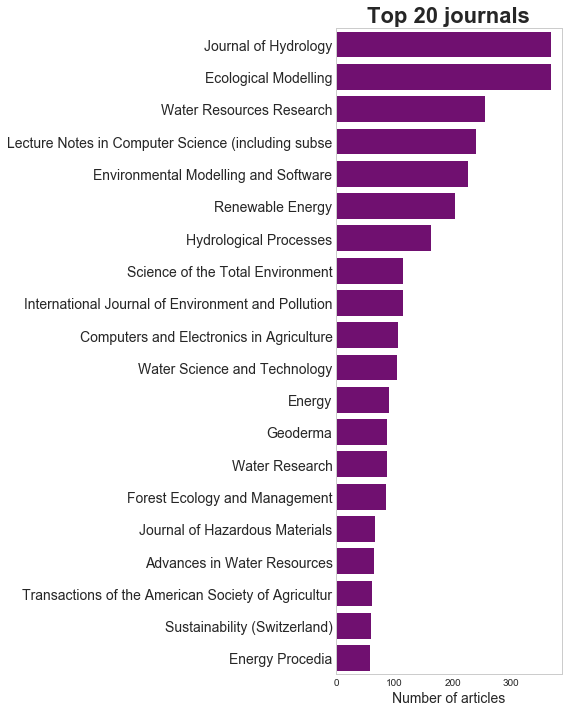

In [23]:
f, ax = plt.subplots(figsize=(8, 10))

sns.set_style("whitegrid")
ax = sns.barplot(x="count", y="journal", data=df_journal, color="PURPLE")
ax.set_ylabel('')
ax.set_xlabel("Number of articles", fontsize=14)
ax.set_title("Top 20 journals", fontsize=22, fontweight="bold")

ylabels = ax.get_yticklabels()
ylabels = [item.get_text()[:50] for item in ylabels]

ax.set_yticklabels(ylabels, fontsize=14)

ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'top_journals_Authors.png', dpi=300, )
plt.show()

### Preparing the word count data for topic modelling

In [17]:
# prepare the data
import pandas as pd
#from memory_profiler import profile

df_counter = pd.DataFrame.from_dict(counter_dict, orient='index')
for word in del_words:
    if word in list(df_counter.columns):
        del df_counter[word]

In [18]:
# fill in the missing values with zeros
df_counter.fillna(0, inplace=True)
# convert the data to integers
df_counter = df_counter.astype(int)
# find and eliminate any records which have no data
doc_count=df_counter.sum(axis='columns')
print(len(df_counter[doc_count!=0]))
df_counter = df_counter[doc_count != 0]

10376


In [4]:
df_counter.shape

(10045, 53484)

This is a matrix of 10045 documents and 53484 words! This large dataset leads to memory errors. Therefore, I remove the words that appeared less than 5 times in the entire dataset of 10045 publications. 

In [5]:
no_words = df_counter.sum(axis='index')
no_words.shape

(53484,)

In [6]:
no_words = no_words[no_words>=5]
no_words.shape

(11267,)

In [7]:
df_counter_reduced = df_counter[list(no_words.index)]

In [8]:
df_counter_reduced.shape

(10045, 11267)

Now I'm working with a dataset of 10045 documents, and 11267 words.

In [12]:
df_counter_reduced.to_csv(directory+'df_counter_reduced_dataset1.csv')

In [18]:
df_counter_reduced = pd.read_csv(directory+'df_counter_reduced_dataset1.csv')

In [9]:
del df_counter

In [14]:
#NORMALIZE THE COUNTER DICTIONARY

doc_count = df_counter_reduced.sum(axis='columns')

df_count_n = df_counter_reduced.div(doc_count,axis='rows')
df_count_n.head()

,,"""","""a","""good","""good""","""model","""the","""validation""","""veri",%,...,–,—,•,→,−,∞,∼,≈,≤,≥
"Chhipi-Shrestha G., Hewage K., Sadiq R.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Valbuena R., Hernando A., Manzanera J.A., Görgens E.B., Almeida D.R.A., Mauro F., García-Abril A., Coomes D.A.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Jiao X., Liao Y., Nguyen T.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Zhao W., Niu D.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Felipe C.M., Roldán J.L., Leal-Rodríguez A.L.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
del df_counter_reduced

In [16]:
df_count_n.shape

(10045, 11267)

In [10]:
# In case there are still meaningless words in the document-word matrix ...

del df_counter_reduced['paper']
del df_counter_reduced['articl']
del df_counter_reduced['=']
del df_counter_reduced['research']
del df_counter_reduced['"a']
del df_counter_reduced['—'] 
del df_counter_reduced['•']
del df_counter_reduced['→']
del df_counter_reduced['−']
del df_counter_reduced['∞']
del df_counter_reduced['∼']
del df_counter_reduced['≈']
del df_counter_reduced['≤']
del df_counter_reduced['≥']
print(len(df_counter_reduced.columns))

Index(['', '"', '"a', '"good', '"good"', '"model', '"the', '"validation"',
       '"veri', '%',
       ...
       '–', '—', '•', '→', '−', '∞', '∼', '≈', '≤', '≥'],
      dtype='object', length=11267)
11267
11263


# Topic modelling


In [15]:
import lda
import time 

a = time.time()

model4 = lda.LDA(n_topics=4, n_iter=5000, random_state=1)
model4 = model4.fit(df_counter_reduced.values) 
b = time.time()
c = b-a
print("time taken is", c)

INFO:lda:n_documents: 10045
INFO:lda:vocab_size: 11252
INFO:lda:n_words: 1017434
INFO:lda:n_topics: 4
INFO:lda:n_iter: 5000
INFO:lda:<0> log likelihood: -9463254
INFO:lda:<10> log likelihood: -8573506
INFO:lda:<20> log likelihood: -8275919
INFO:lda:<30> log likelihood: -8169809
INFO:lda:<40> log likelihood: -8120860
INFO:lda:<50> log likelihood: -8094913
INFO:lda:<60> log likelihood: -8078012
INFO:lda:<70> log likelihood: -8066910
INFO:lda:<80> log likelihood: -8058965
INFO:lda:<90> log likelihood: -8051796
INFO:lda:<100> log likelihood: -8046265
INFO:lda:<110> log likelihood: -8041284
INFO:lda:<120> log likelihood: -8040306
INFO:lda:<130> log likelihood: -8039024
INFO:lda:<140> log likelihood: -8037193
INFO:lda:<150> log likelihood: -8035485
INFO:lda:<160> log likelihood: -8032942
INFO:lda:<170> log likelihood: -8033202
INFO:lda:<180> log likelihood: -8034140
INFO:lda:<190> log likelihood: -8029935
INFO:lda:<200> log likelihood: -8031758
INFO:lda:<210> log likelihood: -8031909
INFO:ld

INFO:lda:<2000> log likelihood: -8024532
INFO:lda:<2010> log likelihood: -8026488
INFO:lda:<2020> log likelihood: -8026097
INFO:lda:<2030> log likelihood: -8026049
INFO:lda:<2040> log likelihood: -8025903
INFO:lda:<2050> log likelihood: -8025601
INFO:lda:<2060> log likelihood: -8025255
INFO:lda:<2070> log likelihood: -8026252
INFO:lda:<2080> log likelihood: -8026508
INFO:lda:<2090> log likelihood: -8025380
INFO:lda:<2100> log likelihood: -8025230
INFO:lda:<2110> log likelihood: -8022259
INFO:lda:<2120> log likelihood: -8021805
INFO:lda:<2130> log likelihood: -8021673
INFO:lda:<2140> log likelihood: -8021406
INFO:lda:<2150> log likelihood: -8023186
INFO:lda:<2160> log likelihood: -8020091
INFO:lda:<2170> log likelihood: -8018769
INFO:lda:<2180> log likelihood: -8019258
INFO:lda:<2190> log likelihood: -8017123
INFO:lda:<2200> log likelihood: -8018058
INFO:lda:<2210> log likelihood: -8016628
INFO:lda:<2220> log likelihood: -8014978
INFO:lda:<2230> log likelihood: -8015362
INFO:lda:<2240> 

INFO:lda:<4000> log likelihood: -7974609
INFO:lda:<4010> log likelihood: -7973615
INFO:lda:<4020> log likelihood: -7975688
INFO:lda:<4030> log likelihood: -7974375
INFO:lda:<4040> log likelihood: -7973849
INFO:lda:<4050> log likelihood: -7973525
INFO:lda:<4060> log likelihood: -7973736
INFO:lda:<4070> log likelihood: -7973661
INFO:lda:<4080> log likelihood: -7973646
INFO:lda:<4090> log likelihood: -7973932
INFO:lda:<4100> log likelihood: -7974159
INFO:lda:<4110> log likelihood: -7973671
INFO:lda:<4120> log likelihood: -7972407
INFO:lda:<4130> log likelihood: -7973198
INFO:lda:<4140> log likelihood: -7973960
INFO:lda:<4150> log likelihood: -7971844
INFO:lda:<4160> log likelihood: -7971945
INFO:lda:<4170> log likelihood: -7971516
INFO:lda:<4180> log likelihood: -7973499
INFO:lda:<4190> log likelihood: -7974071
INFO:lda:<4200> log likelihood: -7974005
INFO:lda:<4210> log likelihood: -7973233
INFO:lda:<4220> log likelihood: -7973451
INFO:lda:<4230> log likelihood: -7973618
INFO:lda:<4240> 

time taken is 179.3816797733307


In [119]:
import numpy as np
#the number of documents in each group
column_sum = np.sum(model4.doc_topic_, axis=0)
column_sum

array([4085.15201948, 2209.9152226 , 1577.89528713, 2172.03747079])

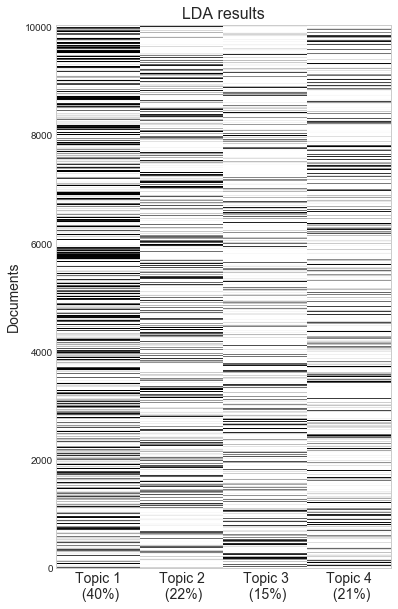

In [120]:
import matplotlib.pyplot as plt
doc_model=model4.doc_topic_

fig, ax = plt.subplots(figsize=(6,10))
heatmap = plt.pcolor(doc_model, cmap='Greys')
ax.set_title("LDA results", fontsize=16)
sm = np.sum(column_sum)
tick_labels = ['Topic {}\n ({}%)'.format(i+1, int(100*column_sum[i]/sm)) for i in range(4)]
ax.set_xticklabels(tick_labels, fontsize=14)
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_ylabel("Documents", fontsize=14)
plt.savefig(directory+'lda_results_4topics_Oct18.png', dpi=300)
plt.show()

In [86]:
model4.doc_topic_

array([[  3.11871227e-02,   5.74446680e-01,   3.93360161e-01,
          1.00603622e-03],
       [  8.03858521e-04,   8.11897106e-02,   8.12700965e-01,
          1.05305466e-01],
       [  8.16993464e-04,   8.01470588e-01,   1.96895425e-01,
          8.16993464e-04],
       ..., 
       [  1.27551020e-03,   1.27551020e-03,   1.54336735e-01,
          8.43112245e-01],
       [  1.86832740e-02,   8.89679715e-04,   8.89679715e-04,
          9.79537367e-01],
       [  9.05797101e-04,   9.97282609e-01,   9.05797101e-04,
          9.05797101e-04]])

In [121]:
topic_word = model4.topic_word_  
n_top_words = 20
word_array = np.array(df_counter_reduced.columns)

for i, topic in enumerate(topic_word):
    topic_words = word_array[np.argsort(topic)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i+1, ' '.join(topic_words)))

Topic 1: data system evalu test method simul develop process base propos applic estim paramet assess inform network set design problem
Topic 2: soil water simul data predict calibr measur observ estim crop paramet climat hydrolog area yield river field flow spatial
Topic 3: predict speci data forest variabl estim tree area distribut popul growth habitat develop sampl site spatial assess stand evalu
Topic 4: simul concentr flow system measur predict data experiment wind develop condit air energi water test valid temperatur process compar


In [41]:
topic_titles = ['Methods', 'Agriculture and Hydrology', 'Ecosystems', 'Emissions and Energy']

In [122]:
topic_dict = {}
for i, topic in enumerate(topic_word):
    top_words = word_array[np.argsort(topic)][:-51:-1]
    top_fracts = np.sort(topic)[:-51:-1]
    topic_dict[topic_titles[i]] = (top_words, top_fracts)
    

In [56]:
#Write the topic contents into csv, make a df first
writer = pd.ExcelWriter(directory+'TopicWords_Dataset1.xlsx', engine='xlsxwriter')
workbook = writer.book
for key, data in topic_dict.items():
    df = pd.DataFrame(list(data))
    df = df.T
    df.to_excel(writer, sheet_name=key)


writer.save()

In [29]:
from wordcloud import WordCloud

In [123]:
topic_fraction = [column_sum[i]/sm for i in range(4)]
topic_order = np.argsort(topic_fraction)
print(topic_fraction, topic_order)

[0.4066851189127151, 0.22000151544021523, 0.15708265675799776, 0.21623070888907198] [2 3 1 0]


C:\Users\eker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\eker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\eker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\eker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\depre

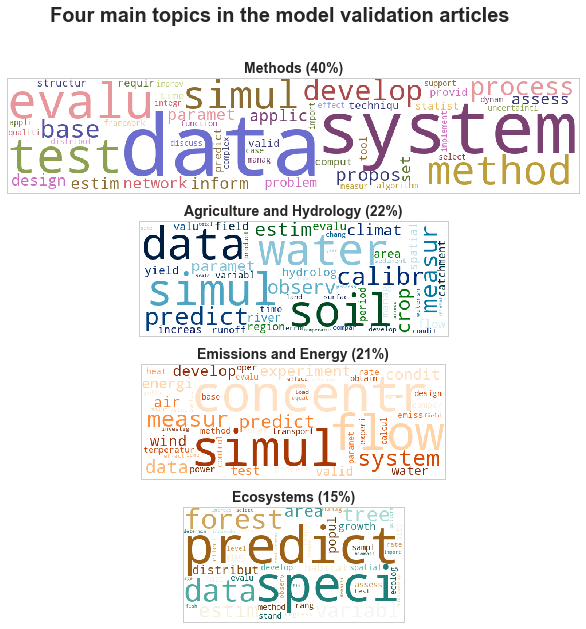

In [124]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns

grid = gridspec.GridSpec(4, 1) 
grid.update(wspace = 0.1,
            hspace = .25)

figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(10)
axes = {}
for i in range(4):
    axes[i] = plt.subplot(grid[i,0])
    axes[i].grid('off')
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])

n_top_words = 50
model_counts = np.array(model4.nzw_).T

cmaps = {'Methods' : 'tab20b',
        'Emissions and Energy' : 'Oranges_r',
        'Agriculture and Hydrology' : 'ocean',
        'Ecosystems' : 'BrBG'}

for i, topic in enumerate(topic_word):
    topic_words = word_array[np.argsort(topic)][:-n_top_words:-1]
    word_cloud_string =' '.join(topic_words)
     # 0 1 3 2
    ax_i = topic_order[::-1][i]
    fr = topic_fraction[i]/max(topic_fraction)
    w = int(fr * 1000)
    wordcloudobj = WordCloud(height=200, width=w, background_color='white')
    wordcloud = wordcloudobj.generate(word_cloud_string)

    axes[ax_i].imshow(wordcloud.recolor(colormap=cmaps[topic_titles[i]], random_state=1))
    axes[ax_i].set_title(topic_titles[i]+' ({}%)'.format(int(100*topic_fraction[i])), fontsize=14, fontweight='bold')


plt.suptitle("Four main topics in the model validation articles", fontsize=20, fontweight='bold')
plt.savefig(directory+'wordcloud_Dataset1_4topics_Oct18.png', dpi=600)
plt.show()    

    

# Dataset II: Scenario context

In [92]:
file_sc = 'DatasetII.csv'
df_sc = pd.read_csv(directory+file_sc, index_col='Authors')
print(df_sc.shape)
df_sc.drop_duplicates(subset='Title', inplace=True)
df_sc.shape

(748, 10)


(748, 10)

In [93]:
df_sc = df_sc.dropna(axis=0, subset=['Abstract'])
df_sc.shape

(748, 10)

In [94]:
import collections as c
import nltk 
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer() 

counter_dict_sc = {}
all_words_sc = c.Counter()

# Get the article id
for index, row in df_sc.iterrows():
    
    # Initialize your counts and lists
    # This is reset with every article
    content = c.Counter()
    stopwordcount = 0

    abstract = row['Abstract']

    # Remove most punctuation
    #depunct = re.sub('[;,\.]@','',abstract) 
    depunct = "".join(c for c in abstract if c not in [':', ',', ';', '.', '-', '@']) 
    # Remove upper case
    low = depunct.lower()
    # make a list of words
    words = low.split(" ")
    for word in words:
        if word in stopwords:
            # if its a stopword count it 
            stopwordcount+=1
        else:
            # if its a content word, stem it and count it
            stem = stemmer.stem(word)
            content[stem]+=1

    # add all the stopwords under a single count
    content['allstopwords']=stopwordcount

    # keep track of the total list of words
    all_words_sc+=content

    # make a dictionary of counters, one for each abstract
    counter_dict_sc[index]=content

    # start again on the next article

In [98]:
del_words = ['allstopwords', 'model', 'result', 'show', 'present', 'gener', 'approach', 'elsevi', 'ltd', 'includ', 'perform']
for key in del_words:
    if key in all_words_sc:
        del all_words_sc[key]
    if key in counter_dict_sc:
        del counter_dict_sc[key]
        
df_wordcount_sc = pd.DataFrame(all_words_sc.most_common(20))
#df_wordcount['words'] = df_wordcount.index.values
#df_wordcount['wordcount'] = df_wordcount[0]
df_wordcount_sc.columns = ['words', 'wordcount']
df_wordcount_sc.head()

,words,wordcount
0,scenario,1192
1,simul,991
2,data,818
3,water,762
4,predict,703


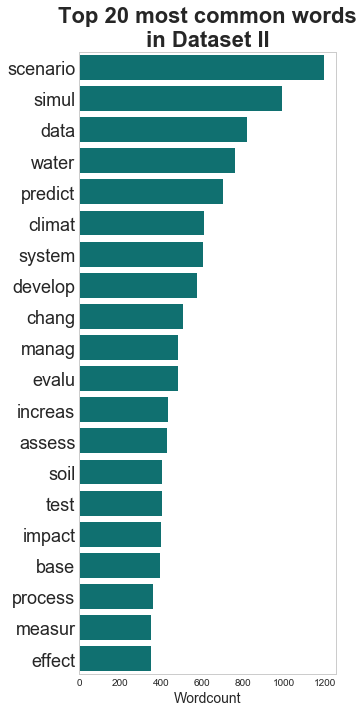

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(5, 10))


ax = sns.barplot(x='wordcount', y='words', data=df_wordcount_sc, color="TEAL")
ax.set_ylabel('')
ax.set_xlabel('Wordcount', fontsize=14)
ax.set_title("Top 20 most common words\nin Dataset II", fontsize=22, fontweight='bold')
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(12) 
ax.set_yticklabels(list(df_wordcount_sc['words']), fontsize=18)
ax.grid(False)
plt.tight_layout()
plt.savefig(directory+'DSII_top_words_Oct18.png', dpi=300, )
plt.show()

## Topic modelling (scenario)

In [100]:
df_counter_sc = pd.DataFrame.from_dict(counter_dict_sc, orient='index')
for word in del_words:
    if word in list(df_counter_sc.columns):
        del df_counter_sc[word]
# fill in the missing values with zeros
df_counter_sc.fillna(0, inplace=True)
# convert the data to integers
df_counter_sc = df_counter_sc.astype(int)
# find and eliminate any records which have no data
doc_count_sc=df_counter_sc.sum(axis='columns')
print(len(df_counter_sc[doc_count_sc!=0]))
df_counter_sc = df_counter_sc[doc_count_sc != 0]

del df_counter_sc['paper']
del df_counter_sc['articl']
del df_counter_sc['=']
del df_counter_sc['research']
print(len(df_counter_sc.columns))

731
11409


In [101]:
df_counter_sc.shape

(731, 11409)

In [102]:
a = time.time()

model4_sc = lda.LDA(n_topics=4, n_iter=5000, random_state=1)
model4_sc = model4_sc.fit(df_counter_sc.values) 
b = time.time()
c = b-a
print("time taken is", c)

INFO:lda:n_documents: 731
INFO:lda:vocab_size: 11409
INFO:lda:n_words: 92377
INFO:lda:n_topics: 4
INFO:lda:n_iter: 5000
INFO:lda:<0> log likelihood: -917341
INFO:lda:<10> log likelihood: -807659
INFO:lda:<20> log likelihood: -787555
INFO:lda:<30> log likelihood: -780957
INFO:lda:<40> log likelihood: -777047
INFO:lda:<50> log likelihood: -775634
INFO:lda:<60> log likelihood: -774056
INFO:lda:<70> log likelihood: -771953
INFO:lda:<80> log likelihood: -770879
INFO:lda:<90> log likelihood: -769841
INFO:lda:<100> log likelihood: -769238
INFO:lda:<110> log likelihood: -768213
INFO:lda:<120> log likelihood: -767698
INFO:lda:<130> log likelihood: -767689
INFO:lda:<140> log likelihood: -767067
INFO:lda:<150> log likelihood: -766746
INFO:lda:<160> log likelihood: -766129
INFO:lda:<170> log likelihood: -765898
INFO:lda:<180> log likelihood: -765269
INFO:lda:<190> log likelihood: -765101
INFO:lda:<200> log likelihood: -764875
INFO:lda:<210> log likelihood: -764842
INFO:lda:<220> log likelihood: -7

INFO:lda:<2050> log likelihood: -760924
INFO:lda:<2060> log likelihood: -761409
INFO:lda:<2070> log likelihood: -761655
INFO:lda:<2080> log likelihood: -761549
INFO:lda:<2090> log likelihood: -761588
INFO:lda:<2100> log likelihood: -761422
INFO:lda:<2110> log likelihood: -761408
INFO:lda:<2120> log likelihood: -761167
INFO:lda:<2130> log likelihood: -761545
INFO:lda:<2140> log likelihood: -761138
INFO:lda:<2150> log likelihood: -761272
INFO:lda:<2160> log likelihood: -761338
INFO:lda:<2170> log likelihood: -760765
INFO:lda:<2180> log likelihood: -761429
INFO:lda:<2190> log likelihood: -761333
INFO:lda:<2200> log likelihood: -760946
INFO:lda:<2210> log likelihood: -761089
INFO:lda:<2220> log likelihood: -760909
INFO:lda:<2230> log likelihood: -760932
INFO:lda:<2240> log likelihood: -761510
INFO:lda:<2250> log likelihood: -761265
INFO:lda:<2260> log likelihood: -761211
INFO:lda:<2270> log likelihood: -761635
INFO:lda:<2280> log likelihood: -761136
INFO:lda:<2290> log likelihood: -761152


INFO:lda:<4100> log likelihood: -761926
INFO:lda:<4110> log likelihood: -761418
INFO:lda:<4120> log likelihood: -761580
INFO:lda:<4130> log likelihood: -761772
INFO:lda:<4140> log likelihood: -761723
INFO:lda:<4150> log likelihood: -761699
INFO:lda:<4160> log likelihood: -761830
INFO:lda:<4170> log likelihood: -761264
INFO:lda:<4180> log likelihood: -761969
INFO:lda:<4190> log likelihood: -761677
INFO:lda:<4200> log likelihood: -761746
INFO:lda:<4210> log likelihood: -761556
INFO:lda:<4220> log likelihood: -761304
INFO:lda:<4230> log likelihood: -761500
INFO:lda:<4240> log likelihood: -761208
INFO:lda:<4250> log likelihood: -761588
INFO:lda:<4260> log likelihood: -761373
INFO:lda:<4270> log likelihood: -761633
INFO:lda:<4280> log likelihood: -761525
INFO:lda:<4290> log likelihood: -761683
INFO:lda:<4300> log likelihood: -761120
INFO:lda:<4310> log likelihood: -761676
INFO:lda:<4320> log likelihood: -761908
INFO:lda:<4330> log likelihood: -761849
INFO:lda:<4340> log likelihood: -761447


time taken is 29.88545250892639


In [125]:
column_sum = np.sum(model4_sc.doc_topic_, axis=0)

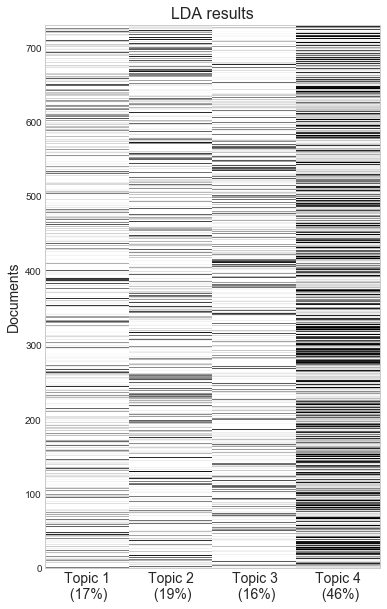

In [126]:
doc_model=model4_sc.doc_topic_

fig, ax = plt.subplots(figsize=(6,10))
heatmap = plt.pcolor(doc_model, cmap='Greys')
ax.set_title("LDA results", fontsize=16)
sm = np.sum(column_sum)
tick_labels = ['Topic {}\n ({}%)'.format(i+1, int(100*column_sum[i]/sm)) for i in range(4)]
ax.set_xticklabels(tick_labels, fontsize=14)
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_ylabel("Documents", fontsize=14)
plt.savefig(directory+'lda_results_4topics_scenario_Oct18.png', dpi=300)
plt.show()

In [135]:
topic_word = model4_sc.topic_word_  
n_top_words = 20
word_array = np.array(df_counter_sc.columns)

for i, topic in enumerate(topic_word):
    topic_words = word_array[np.argsort(topic)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i+1, ' '.join(topic_words)))

Topic 1: water soil simul crop concentr manag yield predict scenario measur data field groundwat plant observ condit agricultur evalu practic
Topic 2: climat water chang scenario increas land impact hydrolog flow futur river simul calibr watersh load period runoff area sediment
Topic 3: predict speci forest distribut scenario data climat popul variabl growth chang estim tree site ecosystem ecolog region habitat condit
Topic 4: scenario simul system data develop test process evalu base assess method design time requir tool applic propos energi inform


In [106]:
topic_titles_sc = ['Agriculture and Hydrology', 'Hydrology and Flood Management', 'Ecosystems', 'Methods']

In [136]:
topic_dict = {}
for i, topic in enumerate(topic_word):
    top_words = word_array[np.argsort(topic)][:-51:-1]
    top_fracts = np.sort(topic)[:-51:-1]
    topic_dict[topic_titles_sc[i]] = (top_words, top_fracts)

In [137]:
writer = pd.ExcelWriter(directory+'TopicWords_Dataset2.xlsx', engine='xlsxwriter')
workbook = writer.book
for key, data in topic_dict.items():
    df = pd.DataFrame(list(data))
    df = df.T
    df.to_excel(writer, sheet_name=key)


writer.save()

In [138]:
topic_fraction = [column_sum[i]/sm for i in range(4)]
topic_order = np.argsort(topic_fraction)
print(topic_fraction, topic_order)

[0.17062814502301987, 0.1989570106796205, 0.16962531241740014, 0.46078953187995947] [2 0 1 3]


In [139]:
desired_order = [2, 1, 3, 0]

C:\Users\eker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\eker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\eker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\eker\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\depre

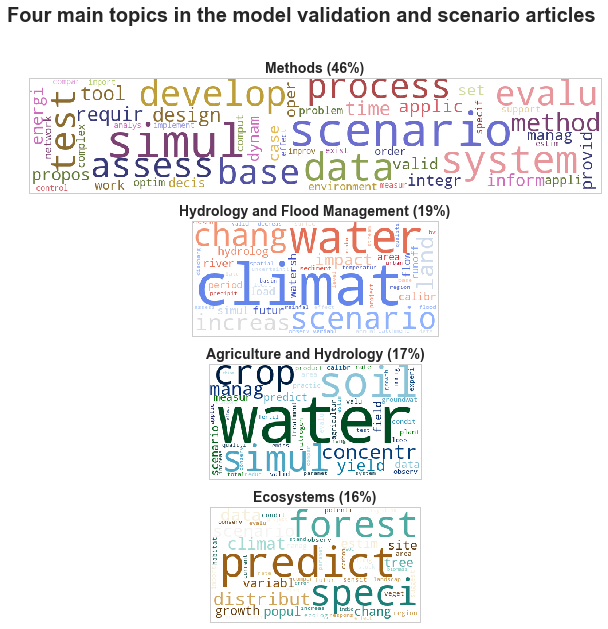

In [140]:
grid = gridspec.GridSpec(4, 1) 
grid.update(wspace = 0.1,
            hspace = .25)

figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(10)
for i in range(4):
    axes[i] = plt.subplot(grid[i,0])
    axes[i].grid('off')
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])

n_top_words = 50
model_counts = np.array(model4_sc.nzw_).T

#cmaps = ['tab20b', 'pink', 'ocean', 'YlGn']
cmaps = {'Methods' : 'tab20b',
        'Hydrology and Climate Change' : 'coolwarm',
        'Agriculture and Hydrology' : 'ocean',
        'Ecosystems' : 'BrBG'}

for i, topic in enumerate(topic_word):
    topic_words = word_array[np.argsort(topic)][:-n_top_words:-1]
    word_cloud_string =' '.join(topic_words)
     # 2 0 1 3 -> 3 1 0 2
    #ax_i = topic_order[::-1][i]
    ax_i = desired_order[i]
    fr = topic_fraction[i]/max(topic_fraction)
    w = int(fr * 1000)
    wordcloudobj = WordCloud(height=200, width=w, background_color='white')
    wordcloud = wordcloudobj.generate(word_cloud_string)

    axes[ax_i].imshow(wordcloud.recolor(colormap=cmaps[topic_titles_sc[i]], random_state=1))
    axes[ax_i].set_title(topic_titles_sc[i]+' ({}%)'.format(int(100*topic_fraction[i])), fontsize=14, fontweight='bold')


plt.suptitle("Four main topics in the model validation and scenario articles", fontsize=20, fontweight='bold')
plt.savefig(directory+'wordcloud_Dataset2_4topics_Oct18.png', dpi=600)
plt.show()